# Gaussianity of priors: 

In [1]:
import sys
import numpy as np
import pickle
import pandas as pd
import sys

from scipy import stats
from scipy import signal

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [2]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

In [4]:
def load_ccsm4_lm_regridded():
    ccsm4_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/CCSM4/CCSM4_last_millennium/'
    ccsm4_file = 'ccsm4_sic_sit_tas_20CRv2_850_1850_full.npz'

    ccsm4_lm = np.load(ccsm4_dir+ccsm4_file)

    ccsm4_truth_sic = ccsm4_lm['sic_ccsm4']
    ccsm4_truth_sit = ccsm4_lm['sit_ccsm4']
    ccsm4_truth_tas = ccsm4_lm['tas_ccsm4']
    ccsm4_truth_lat = ccsm4_lm['lat_ccsm4']
    ccsm4_truth_lon = ccsm4_lm['lon_ccsm4']
    
    return ccsm4_truth_tas, ccsm4_truth_sic, ccsm4_truth_sit, ccsm4_truth_lat, ccsm4_truth_lon

In [5]:
def load_mpi_lm_regridded():
    mpi_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/MPI/'
    mpi_file = 'mpi_sic_sit_tas_20CRv2_850_1850_full.npz'

    mpi_lm = np.load(mpi_dir+mpi_file)

    mpi_truth_sic = mpi_lm['sic_mpi']
    mpi_truth_sit = mpi_lm['sit_mpi']
    mpi_truth_tas = mpi_lm['tas_mpi']
    mpi_truth_lat = mpi_lm['lat_mpi']
    mpi_truth_lon = mpi_lm['lon_mpi']
    
    return mpi_truth_tas, mpi_truth_sic, mpi_truth_sit, mpi_truth_lat, mpi_truth_lon

In [6]:
def sub_arctic_plot(fig,ax,VAR1,LAT,LON,TITLE1,MAX1,colorbar=True,extent=True):
    var1, lon1 = add_cyclic_point(VAR1, coord=LON)
    new_lon2d, new_lat2d = np.meshgrid(lon1, LAT)
    if extent is True: 
        ax.set_extent([-150, 140, 50, 90], crs=ccrs.PlateCarree())
    ax.gridlines(linestyle='--')
    ax.add_feature(cfeature.LAND, facecolor=(1,1,1))
    cs = ax.pcolormesh(new_lon2d, new_lat2d, var1, 
                       vmin=-MAX1, vmax=MAX1, cmap=plt.cm.RdBu_r, 
                       transform=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.5)
    if colorbar is True:
        plt.colorbar(cs, ax=ax)
    ax.set_title(TITLE1)
    
    return cs

In [7]:
proj = dict(projection=ccrs.Stereographic(central_latitude=90,
                                          central_longitude=-45,
                                          true_scale_latitude=0.1))

In [8]:
plt.rcParams['figure.dpi']=200

In [9]:
anom_start = 850
anom_end = 1850

### Load Prior: 

In [10]:
[ccsm4_truth_tas, ccsm4_truth_sic, 
 ccsm4_truth_sit,
 ccsm4_truth_lat, ccsm4_truth_lon] = load_ccsm4_lm_regridded()

ccsm4_truth_time = np.arange(850,1851,1)

In [11]:
[sia_nh_ccsm4_truth, sie_nh_ccsm4_truth, 
 sia_nh_ccsm4_truth_anom, sie_nh_ccsm4_truth_anom,
 sia_sh_ccsm4_truth, sie_sh_ccsm4_truth, 
 sia_sh_ccsm4_truth_anom, 
 sie_sh_ccsm4_truth_anom] = ce_utils.calc_lm_tot_si(ccsm4_truth_sic,ccsm4_truth_lat, 
                                                    ccsm4_truth_time, anom_start, anom_end)

In [12]:
[mpi_truth_tas, mpi_truth_sic, 
 mpi_truth_sit,
 mpi_truth_lat, mpi_truth_lon] = load_mpi_lm_regridded()

mpi_time = np.arange(850,1850,1)

In [13]:
[sia_nh_mpi, sie_nh_mpi, 
 sia_nh_mpi_anom, sie_nh_mpi_anom,
 sia_sh_mpi, sie_sh_mpi, 
 sia_sh_mpi_anom, sie_sh_mpi_anom] = ce_utils.calc_lm_tot_si(mpi_truth_sic,mpi_truth_lat, 
                                                             mpi_time, anom_start, anom_end)

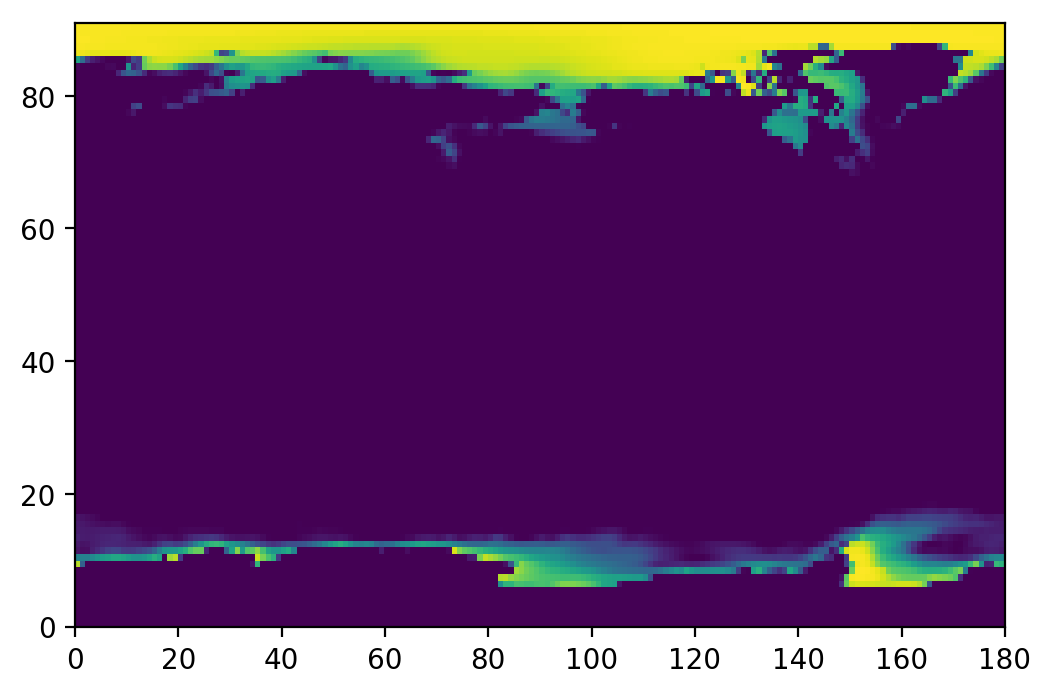

In [14]:
plt.pcolormesh(mpi_truth_sic[0,:,:])

(array([ 47.,  90., 128., 133., 165., 162., 144.,  82.,  31.,  18.]),
 array([9.10176401e-03, 8.34820524e+00, 1.66873087e+01, 2.50264122e+01,
        3.33655157e+01, 4.17046192e+01, 5.00437226e+01, 5.83828261e+01,
        6.67219296e+01, 7.50610331e+01, 8.34001366e+01]),
 <a list of 10 Patch objects>)

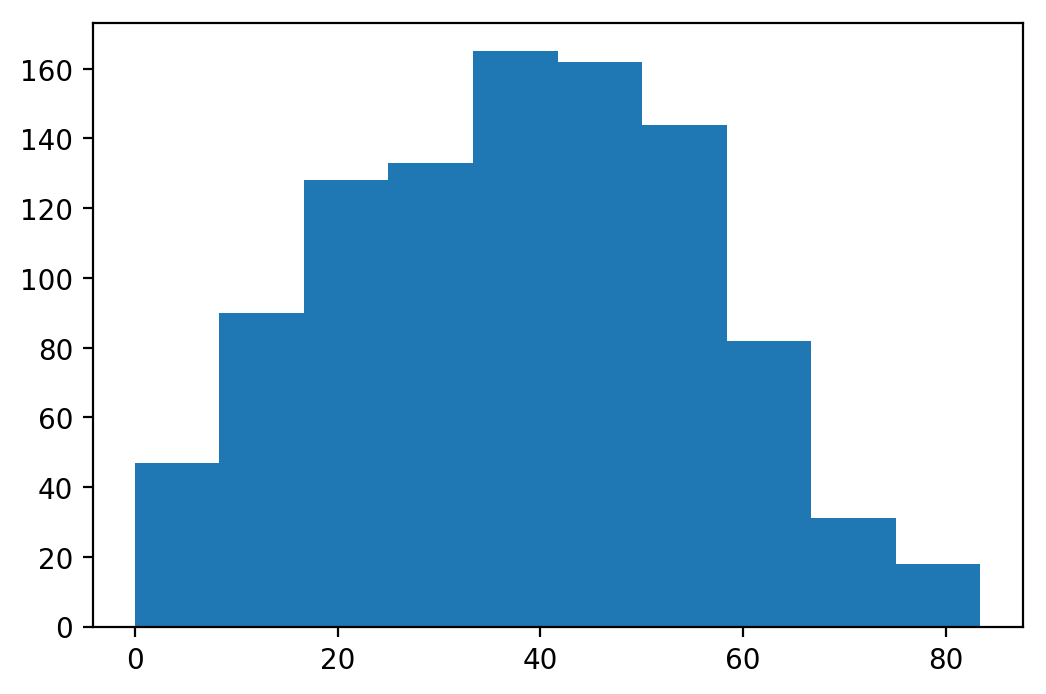

In [15]:
plt.hist(mpi_truth_sic[:,80,170])

In [16]:
kurt_mpi = stats.kurtosis(mpi_truth_sic,fisher=True,axis=0)
kurt_ccsm4 = stats.kurtosis(ccsm4_truth_sic,fisher=True,axis=0)

In [17]:
ccsm4_truth_lat.shape

(91, 180)

In [18]:
#lat_50N_ind = np.where(ccsm4_truth_lat[:,0]>50)
land_mask = np.ones((91,180))

for la in range(91):
    for lo in range(180):
        if np.allclose(ccsm4_truth_sic[:,la,lo],0):
            land_mask[la,lo] = np.nan


/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)
/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


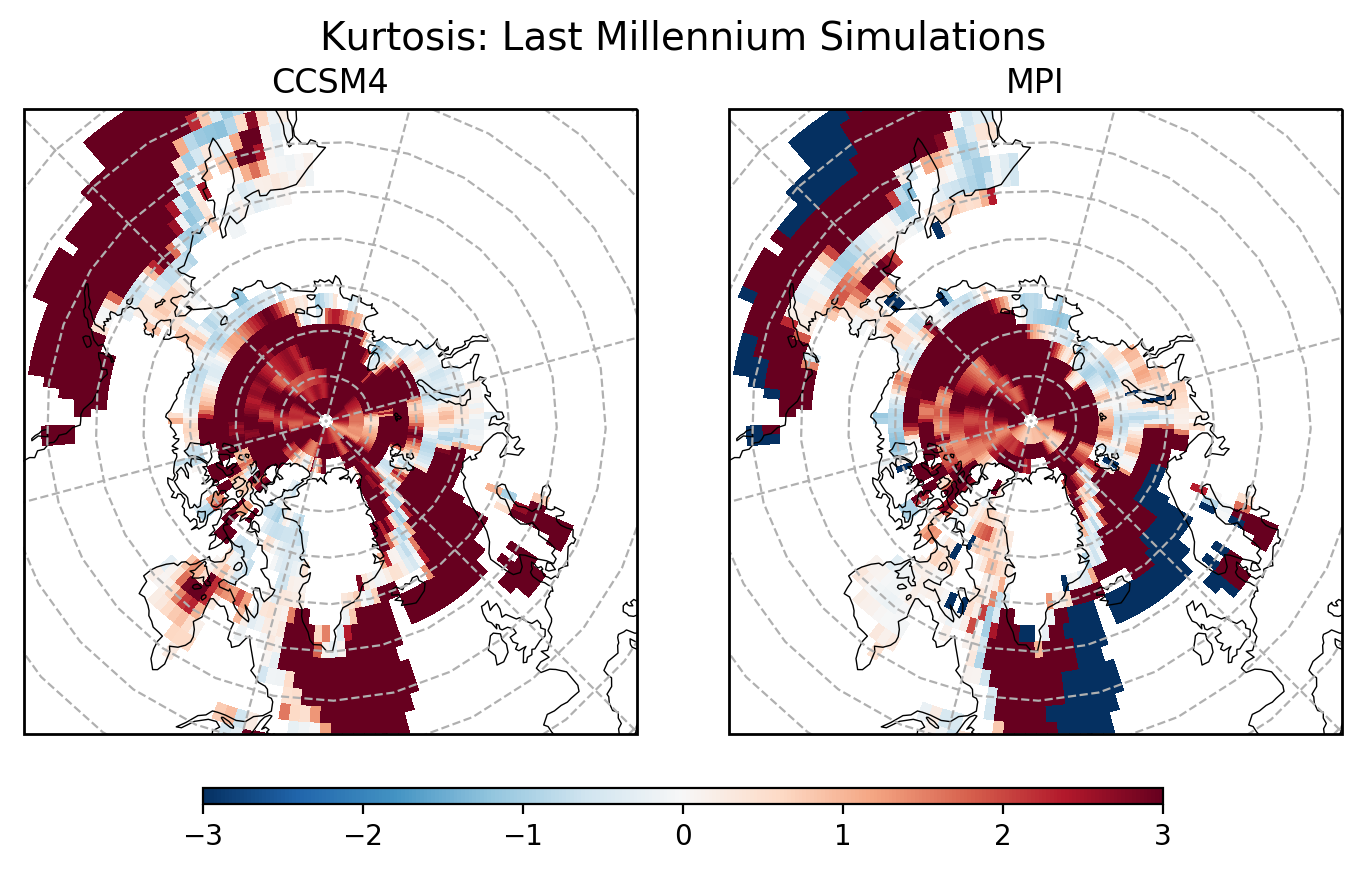

In [19]:
fig,ax = plt.subplots(1,2, figsize=(8, 4), subplot_kw = proj)
ax = ax.flatten()

cs = sub_arctic_plot(fig,ax[0],kurt_ccsm4*land_mask,ccsm4_truth_lat[:,0],ccsm4_truth_lon[0,:],
                     'CCSM4',3, colorbar=False)
cs1 = sub_arctic_plot(fig,ax[1],kurt_mpi*land_mask,mpi_truth_lat[:,0],mpi_truth_lon[0,:],
                      'MPI',3, colorbar=False)

position=fig.add_axes([0.15,0.0,0.6,0.02])
cb = plt.colorbar(cs, cax=position, orientation='horizontal')

fig.suptitle('Kurtosis: Last Millennium Simulations', fontsize=14, x=0.45)
plt.tight_layout(rect=(0,0.05,0.90,0.94))

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'sat_recon_ce_corr_spatial_validation.png'
#plt.savefig(savedir+savename, bbox_inches='tight')

In [22]:
kurt_test_mpi = stats.kurtosistest(mpi_truth_sic,axis=0)
kurt_test_ccsm4 = stats.kurtosistest(ccsm4_truth_sic,axis=0)

In [26]:
kurt_test_mpi

KurtosistestResult(statistic=array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.23006036, 3.23792949, 3.36106373, ..., 4.08609026, 3.52837167,
        3.28112615],
       [4.95372972, 4.963213  , 4.99110047, ..., 4.90986917, 4.9842462 ,
        4.96306215],
       [6.07019786, 6.13748814, 6.20605525, ..., 5.89308552, 5.94797853,
        6.00690959]]), pvalue=array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.23764085e-